In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import zipf
from scipy import special 

In [3]:
d = pd.read_csv("./z_ass/d_euclidean_B20_L50_non_iid_zipfz0.7")

In [4]:
d.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,0.422299,1.244019,0.636178,0.951451,0.739809,1.352840,2.001803,0.336619,0.319686,...,0.455087,0.439671,0.342424,1.107165,0.773492,0.761543,0.629480,0.685858,0.332345,0.737211
std,29.011492,0.446409,0.352182,0.403357,0.281658,0.313715,0.251109,0.285005,0.459942,0.472125,...,0.407762,0.417918,0.455043,0.282301,0.330570,0.344015,0.354143,0.341056,0.455674,0.354298
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.750000,0.202552,1.105149,0.444965,0.844678,0.606821,1.290121,1.969182,0.097977,0.069853,...,0.277648,0.240331,0.112829,1.047140,0.672716,0.653199,0.498519,0.566937,0.099062,0.610552
50%,49.500000,0.229622,1.130208,0.469327,0.863421,0.632478,1.319150,1.998289,0.117989,0.094261,...,0.291503,0.263815,0.132797,1.063376,0.699338,0.676389,0.525442,0.592739,0.114129,0.626226
75%,74.250000,0.405241,1.190835,0.647993,0.914202,0.675296,1.347527,2.023710,0.420600,0.406615,...,0.425580,0.458343,0.397575,1.096986,0.724588,0.699001,0.549714,0.617094,0.391456,0.656012
max,99.000000,2.577655,3.125708,2.870511,2.694098,2.446652,2.685528,3.100024,2.560274,2.568153,...,2.321098,2.423969,2.482499,2.244749,2.070129,2.215495,2.084271,2.078617,2.538345,2.265486


In [58]:
z_rnd_acc = pd.read_csv("./EFL/z_rnd.csv.acc 2.csv")
z_metis_acc = pd.read_csv("./EFL/graph_weight_euclidean_diff.txt.part.10.acc.csv")

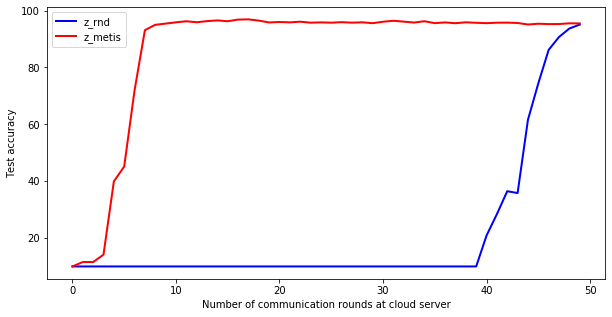

In [73]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
plt.plot(range(z_rnd_acc.shape[0]), z_rnd_acc['acc'], linewidth = 2, color = 'blue', label = "z_rnd")
plt.plot(range(z_rnd_acc.shape[0]), z_metis_acc['acc'], linewidth = 2, color = 'red', label = "z_metis")
#plt.xtitle('Number of communication rounds at cloud server', fontsize=18)
#plt.ytitle('Test accuracy', fontsize=16)
#plt.legend(loc = 'best')

ax.set_xlabel('Number of communication rounds at cloud server')
ax.set_ylabel('Test accuracy')
ax.legend(loc='best')
plt.show()

In [3]:
a = d['0'].tolist()

In [4]:
a = []
for i in range(100):
    a = a + d[str(i)].tolist()

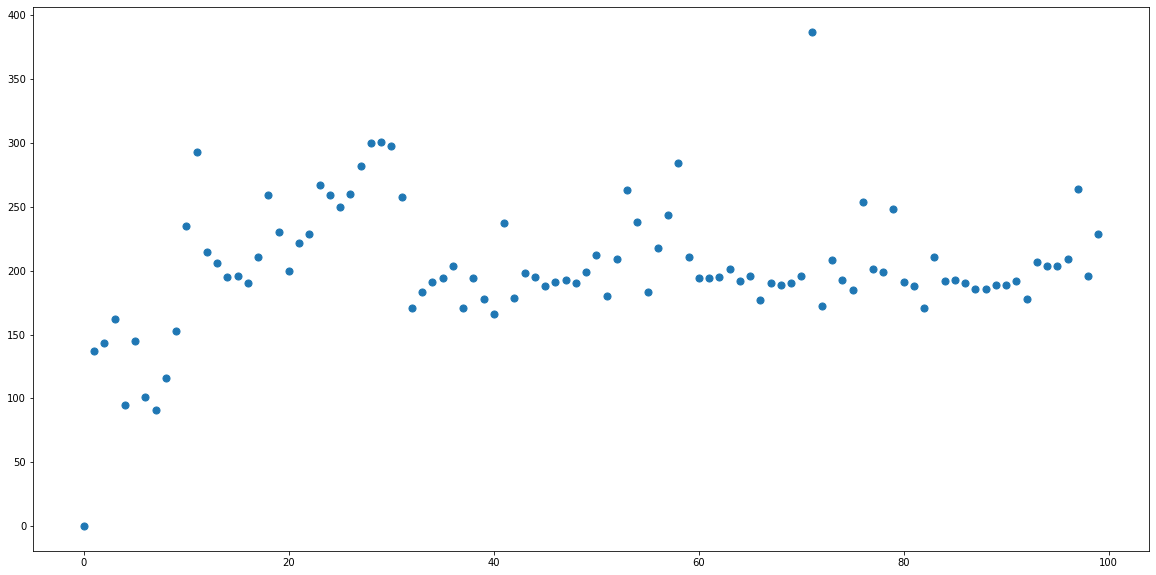

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(range(100), a[0:100], s = 50)
plt.show()

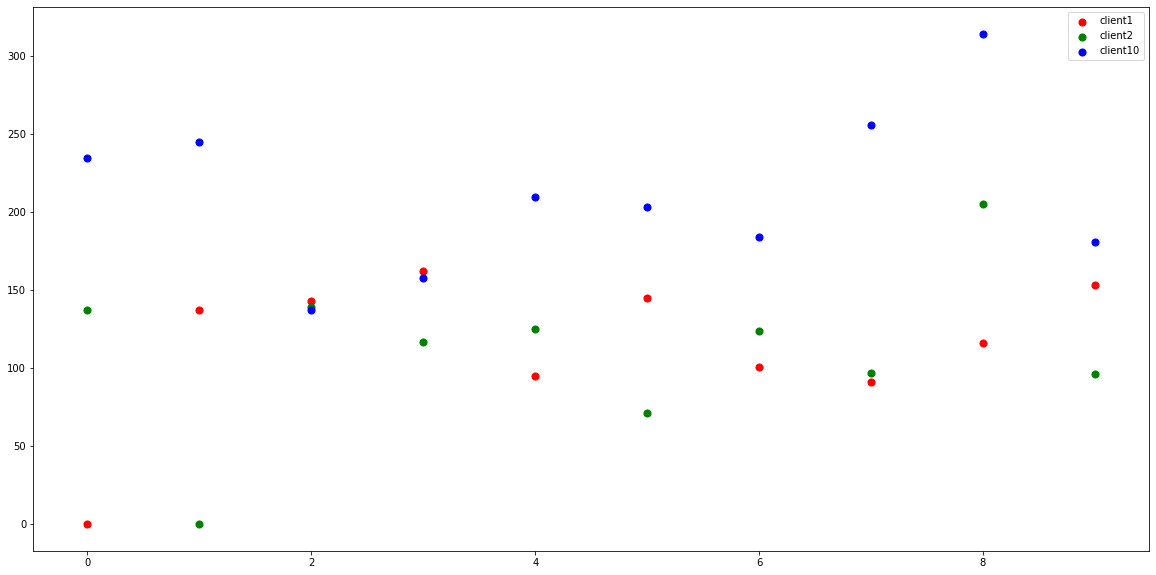

In [6]:
plt.figure(figsize=(20,10))
plt.scatter(range(10), a[0:10], s = 50, color = 'red', label = 'client1')
plt.scatter(range(10), a[100:110], s = 50, color = 'green', label = 'client2')

plt.scatter(range(10), a[10*100:10*100+100-90], s = 50, color = 'blue', label = 'client10')
plt.legend(loc='best')
plt.show()

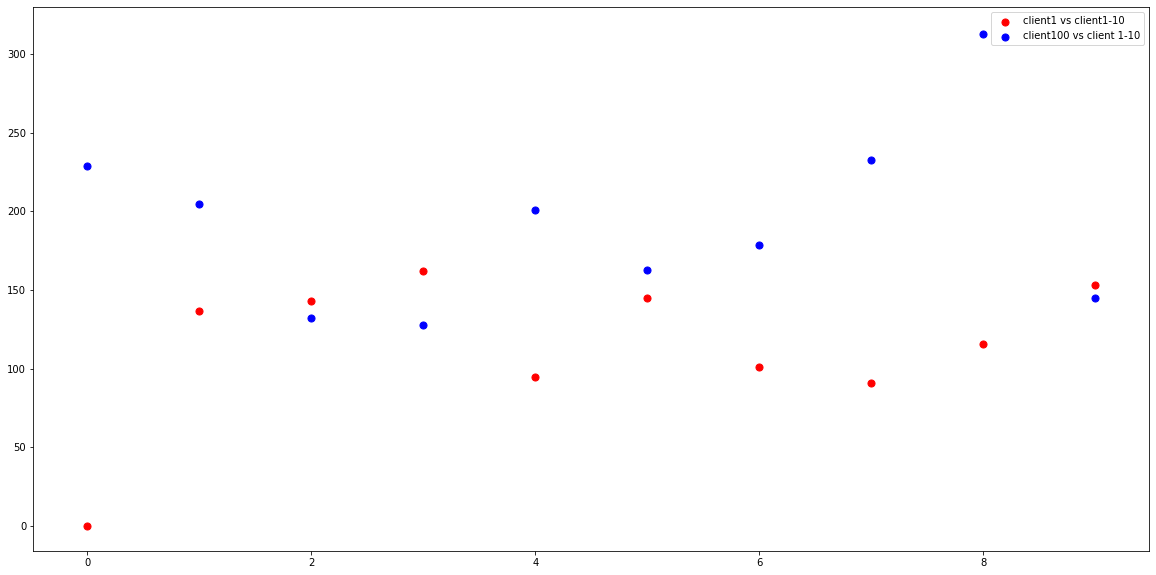

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(range(10), a[0:10], s = 50, color = 'red', label = 'client1 vs client1-10')
plt.scatter(range(10), a[100 * (100 - 1):100 * (100 - 1) + 10], s = 50, color = 'blue', label = 'client100 vs client 1-10')
plt.legend(loc='best')
plt.show()

In [13]:
a = []
for i in range(100):
    a.append(d[str(i)].tolist())
    
dp = []
for i in range(100):
    for j in range(i + 1, 100):
        dp = dp + [a[i][j]]
    

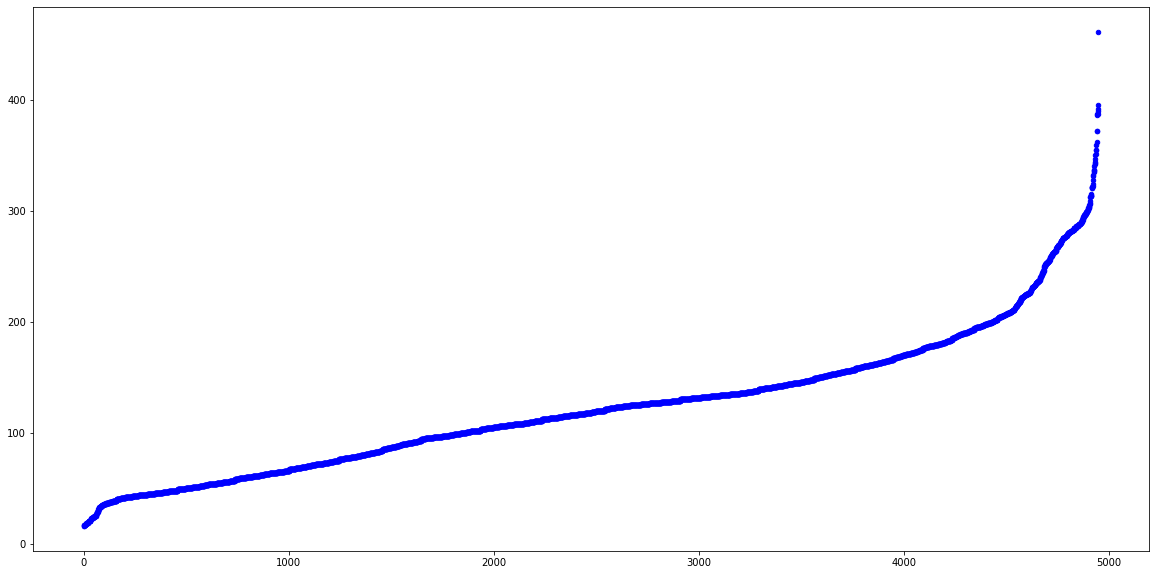

In [14]:
plt.figure(figsize=(20,10))
#plt.scatter(range(10), a[0:10], s = 50, color = 'red', label = 'client1 vs client1-10')
dp.sort()
plt.scatter(range(len(dp)), dp, s = 20, color = 'blue')
#plt.legend(loc='best')
plt.show()

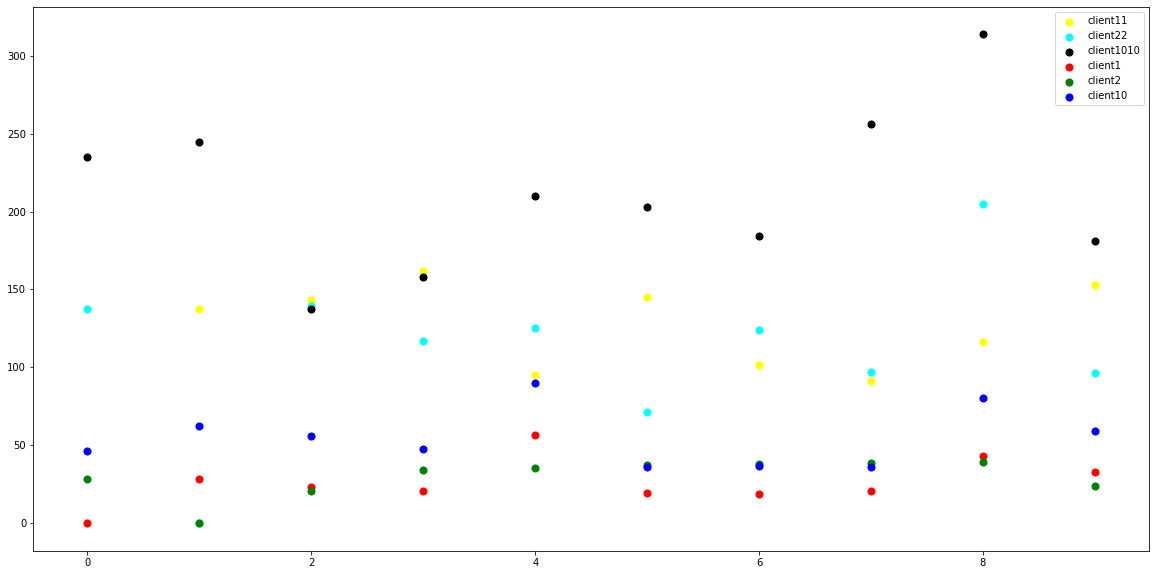

In [10]:
wd = 300*np.load("./z_ass/weight_diff.npy")
plt.figure(figsize=(20,10))


#plt.figure(figsize=(20,10))
plt.scatter(range(10), a[0:10], s = 50, color = 'yellow', label = 'client11')
plt.scatter(range(10), a[100:110], s = 50, color = 'cyan', label = 'client22')

plt.scatter(range(10), a[10*100:10*100+100-90], s = 50, color = 'black', label = 'client1010')
#plt.legend(loc='best')
#plt.show()

plt.scatter(range(10), wd[0][0:10], s = 50, color = 'red', label = 'client1')
plt.scatter(range(10), wd[1][0:10], s = 50, color = 'green', label = 'client2')

plt.scatter(range(10), wd[10][0:10], s = 50, color = 'blue', label = 'client10')
plt.legend(loc='best')
plt.show()

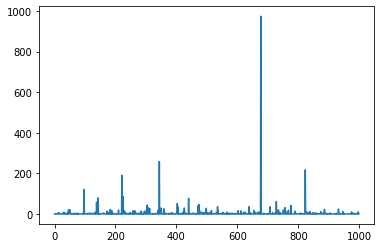

In [14]:
fig, ax = plt.subplots(1, 1)
y = zipf.rvs(2, size=1000)
plt.plot(range(1000), y)
plt.show()

[                  1            15396012         28042465223
           331453048                9748                 388
           524789832   72741135184326416       5851573661900
          1472476968     274762604551572                 193
                   8                   1                   1
                   1            69929675             5702657
                   1     170798585773775      29409546527856
     554364793318515       4450121189007         24250186535
                1612          7190294235              426885
                1494       1802314227939                  36
   27531164414329196             3701705          1554938686
           739856653           187993571                   1
        261380546923            59974544                1475
      10455844777810                   2              511454
                 731                 195    3123284166216706
           106382798         50098944095                   5
                8641    

Text(0.5, 1.0, 'a=2.5')

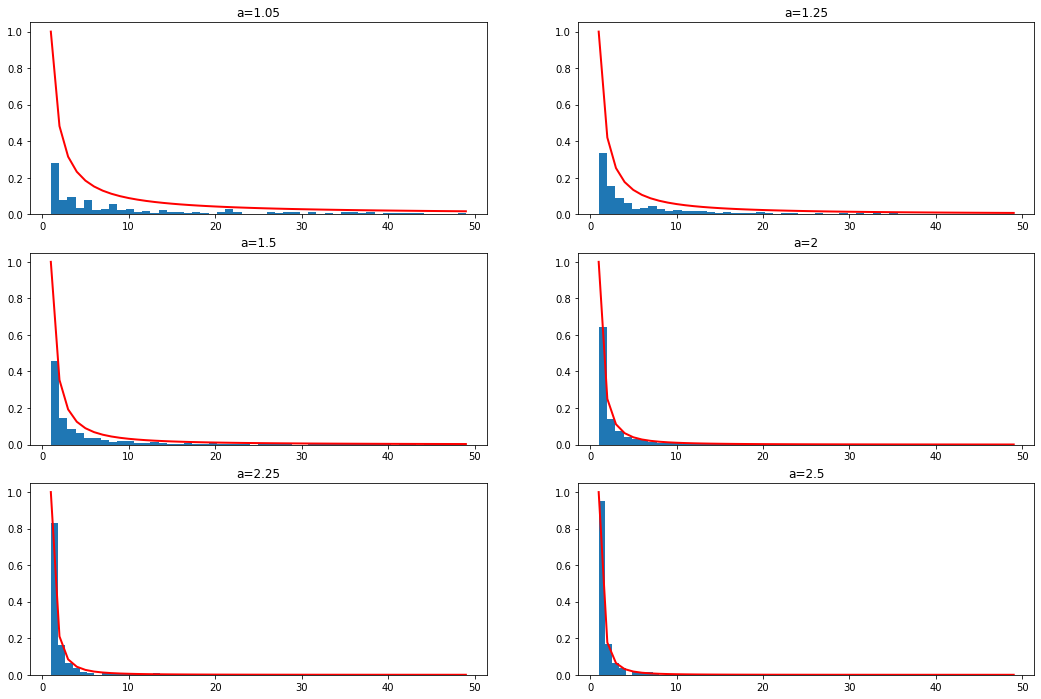

In [36]:
#plt.figure(figsize = (20,15))
fig, axs = plt.subplots(3, 2, figsize = (18,12))

a = 1.05 # parameter
s = np.random.zipf(a, 1000)
print(s)
x = np.arange(1., 50.)
y = x**(-a) / special.zetac(a)  

axs[0, 0].hist(s[s<50], 50, density=True)
axs[0, 0].plot(x, y/max(y), linewidth=2, color='r')
axs[0, 0].set_title("a=1.05")

a = 1.25 # parameter
s = np.random.zipf(a, 1000)
y = x**(-a) / special.zetac(a)  

axs[0, 1].hist(s[s<50], 50, density=True)
axs[0, 1].plot(x, y/max(y), linewidth=2, color='r')
axs[0, 1].set_title("a=1.25")

a = 1.5 # parameter
s = np.random.zipf(a, 1000)
y = x**(-a) / special.zetac(a)  

axs[1, 0].hist(s[s<50], 50, density=True)
axs[1, 0].plot(x, y/max(y), linewidth=2, color='r')
axs[1, 0].set_title("a=1.5")

a = 2 # parameter
s = np.random.zipf(a, 1000)
y = x**(-a) / special.zetac(a)  

axs[1, 1].hist(s[s<50], 50, density=True)
axs[1, 1].plot(x, y/max(y), linewidth=2, color='r')
axs[1, 1].set_title("a=2")

a = 2.25 # parameter
s = np.random.zipf(a, 1000)
y = x**(-a) / special.zetac(a)  

axs[2, 0].hist(s[s<50], 50, density=True)
axs[2, 0].plot(x, y/max(y), linewidth=2, color='r')
axs[2, 0].set_title("a=2.25")

a = 2.5 # parameter
s = np.random.zipf(a, 1000)
y = x**(-a) / special.zetac(a)  

axs[2, 1].hist(s[s<50], 50, density=True)
axs[2, 1].plot(x, y/max(y), linewidth=2, color='r')
axs[2, 1].set_title("a=2.5")








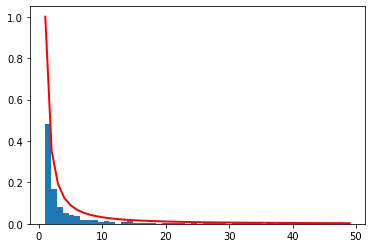

In [19]:
a = 1.25 # parameter

s = np.random.zipf(a, 1000)
count, bins, ignored = plt.hist(s[s<50], 50, density=True)

x = np.arange(1., 50.)

y = x**(-a) / special.zetac(a)  

plt.plot(x, y/max(y), linewidth=2, color='r')  
plt.show()

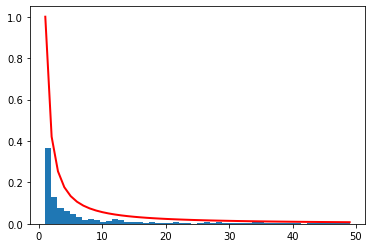

In [20]:
a = 1.25 # parameter

s = np.random.zipf(a, 1000)
count, bins, ignored = plt.hist(s[s<50], 50, density=True)

x = np.arange(1., 50.)

y = x**(-a) / special.zetac(a)  

plt.plot(x, y/max(y), linewidth=2, color='r')  
plt.show()

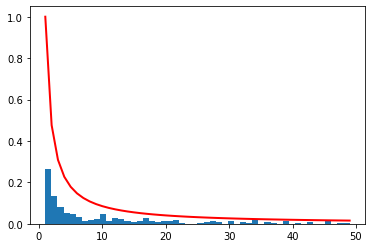

In [22]:
a = 1.07 # parameter

s = np.random.zipf(a, 1000)
count, bins, ignored = plt.hist(s[s<50], 50, density=True)

x = np.arange(1., 50.)

y = x**(-a) / special.zetac(a)  

plt.plot(x, y/max(y), linewidth=2, color='r')  
plt.show()

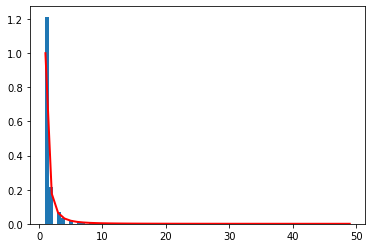

In [25]:
a = 2.5 # parameter

s = np.random.zipf(a, 1000)
count, bins, ignored = plt.hist(s[s<50], 50, density=True)

x = np.arange(1., 50.)

y = x**(-a) / special.zetac(a)  

plt.plot(x, y/max(y), linewidth=2, color='r')  
plt.show()

In [43]:
a = 2
x = [1, 2, 3, 4, 5]
prob = zipf.pmf(x, a)
print(prob)

[0.6079271  0.15198178 0.06754746 0.03799544 0.02431708]


In [44]:
sum(prob)

0.8897688610191294

In [62]:
r = zipf.rvs(a, size=100)

In [63]:
print(r)
r = r/sum(r)
sum(r)

[ 1  4  2  1  2  1  1  1  3  1  1  7  3  1  1  1  1  3  1  1  1  4  1  1
  1  1  1  5  1  1  1  1  1  3  1  1  1  2  1  1  1  1  2  2  1  1  1  1
  1  1  1  1 12 78  1  1  3  1  1  1  4  1  3  1  1  6  1  1  6  1  2  1
  1  2  1  4  6  3  1  1  6  1  1  5 15  1  3  1  1 12  1  1  1  1  1 11
  4  6  5  1]


0.9999999999999996

In [64]:
r = zipf.rvs(a, size=100)
print(r)

[ 2  1  1  2  1  1  1  1  1  6  1  1  1  2  1  1  1  2  1  6  1  4  4  1
  3  2  1  1  1  2  1  1  9  3  1  3  5  4  1  1  1  1  1  9  1 21  1  1
  1 30  4  3  2  8  1  1  1  1  7 40  2  2  1  1  1 14  3  2  1  3  2  3
  1  1  1  1  1  2  1  1  7  2  1  1  2  1  1  1 22  1  1 20  1  1  1  1
  1  8  7  1]


In [ ]:
r = zipf.rvs(a, size=100)

100


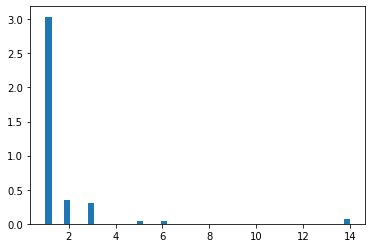

In [68]:
a = 2.5 # parameter

s = np.random.zipf(a, 100)

print(len(s))
count, bins, ignored = plt.hist(s[s<100], 50, density=True)

#x = np.arange(1., 50.)

#y = x**(-a) / special.zetac(a)  

In [69]:
s

array([ 1,  1,  1,  5,  1,  2,  1,  2,  1,  2,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  3,  3,  3,  1,  2,  1,  1,  1,  2,  3,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 14,  1,  1,  1,  1,  1,  1,  2,
        1,  1,  1,  1,  1,  1,  1,  2,  3,  1,  6,  1,  1,  1,  3,  1,  1,
        1,  1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1, 14,  1,  1,
        1,  1,  1,  1,  2,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [70]:
s = np.random.zipf(a, 100)
s

array([ 1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,
        1,  1,  1,  1,  1,  5,  1, 37,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  8,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1,  2,  7,  1,  1,  3,  3,  6,  1,  1,  3,  1,  2,  1,
        1,  2,  2,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1])

In [80]:
z = 1
p = np.range(1,101)
p

AttributeError: module 'numpy' has no attribute 'range'

In [81]:
range(1000)

range(0, 1000)

In [98]:
p = (1/np.arange(1,101))**()
p = p/sum(p)
p

array([0.19277564, 0.09638782, 0.06425855, 0.04819391, 0.03855513,
       0.03212927, 0.02753938, 0.02409695, 0.02141952, 0.01927756,
       0.01752506, 0.01606464, 0.0148289 , 0.01376969, 0.01285171,
       0.01204848, 0.01133974, 0.01070976, 0.01014609, 0.00963878,
       0.00917979, 0.00876253, 0.00838155, 0.00803232, 0.00771103,
       0.00741445, 0.00713984, 0.00688484, 0.00664744, 0.00642585,
       0.00621857, 0.00602424, 0.00584169, 0.00566987, 0.00550788,
       0.00535488, 0.00521015, 0.00507304, 0.00494297, 0.00481939,
       0.00470184, 0.0045899 , 0.00448315, 0.00438126, 0.0042839 ,
       0.00419077, 0.00410161, 0.00401616, 0.0039342 , 0.00385551,
       0.00377991, 0.00370722, 0.00363728, 0.00356992, 0.00350501,
       0.00344242, 0.00338203, 0.00332372, 0.00326738, 0.00321293,
       0.00316026, 0.00310928, 0.00305993, 0.00301212, 0.00296578,
       0.00292084, 0.00287725, 0.00283494, 0.00279385, 0.00275394,
       0.00271515, 0.00267744, 0.00264076, 0.00260508, 0.00257

In [99]:
sum(p)

1.0

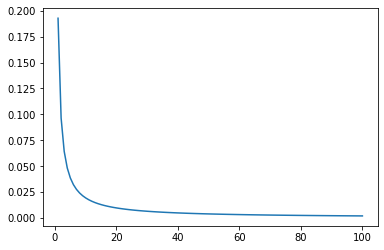

In [100]:
plt.plot(range(1,101), p)
plt.show()

In [97]:
6000 - 5948 + 1277

1329

In [101]:
sum([661, 273, 440, 704, 494, 491, 384, 833, 1103, 617])

6000

In [2]:
#produce z_rnd_part7 assignment
import random
n = 100
m = 8

z = np.empty(n, dtype=int)
tmp = random.sample(set(np.arange(n)), m)
for s in range (m):
    z[tmp[s]] = s

remaining = set(np.arange(n)) - set(tmp)
for i in remaining:
    s = random.randint(0,m-1)
    z[i] = s
df = pd.DataFrame(z.tolist())
print(z)
df.to_csv("./z_ass/2z_rnd.part" + str(m), header=False, index=False)

[7 2 5 0 4 6 1 0 4 7 7 5 5 0 3 1 3 1 6 6 0 5 2 7 4 5 0 4 0 4 4 6 2 5 2 4 2
 0 5 0 6 5 2 5 5 5 3 0 6 0 1 3 6 4 7 2 4 3 6 2 1 6 6 5 5 2 2 0 5 0 0 1 0 5
 7 3 0 3 7 3 1 4 4 3 1 4 6 1 0 2 6 5 6 0 3 2 0 5 3 5]


In [12]:
tmp

[41, 64, 85, 84, 66, 43, 75, 9]

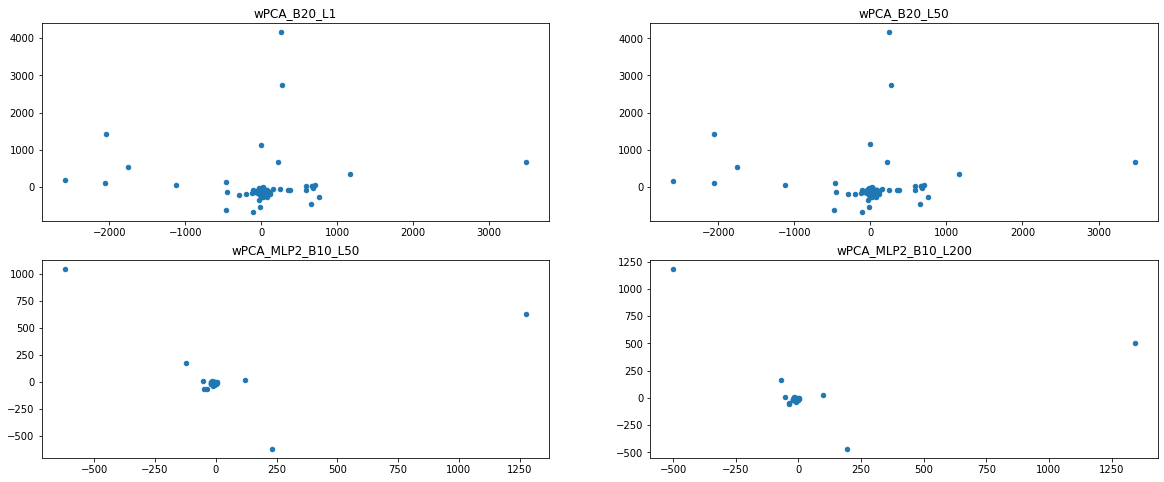

In [9]:
wPoint_L1 = pd.read_csv("./z_ass/wPCA_B20_L1_non_iid_zipfz0.7")
wPoint_L50 = pd.read_csv("./z_ass/wPCA_B20_L50_non_iid_zipfz0.7")
wPoint_MLP2_L50 = pd.read_csv("./z_ass/wPCA_MLP2_B10_L50_non_iid_zipfz0.7")

wPoint_MLP2_L200 = pd.read_csv("./z_ass/wPCA_MLP2_B10_L200_non_iid_zipfz0.7")

fig, axs = plt.subplots(2, 2, figsize=(20,8))

#fig = plt.figure(figsize=(20,5))
#ax = fig.add_subplot(111)

axs[0,0].scatter(wPoint_L1['pc1'],wPoint_L1['pc2'] , s= 20)
axs[0,1].scatter(wPoint_L50['pc1'],wPoint_L50['pc2'], s=20 )

axs[1,0].scatter(wPoint_MLP2_L50['pc1'],wPoint_MLP2_L50['pc2'], s=20 )

axs[1,1].scatter(wPoint_MLP2_L200['pc1'],wPoint_MLP2_L200['pc2'], s=20 )


axs[0,0].set_title("wPCA_B20_L1")
axs[0,1].set_title("wPCA_B20_L50")
axs[1,0].set_title("wPCA_MLP2_B10_L50")
axs[1,1].set_title("wPCA_MLP2_B10_L200")


#ax.set_ylabel('Test accuracy')
#ax.legend(loc='best')
plt.show()

In [2]:
from sklearn.cluster import KMeans

z_metis = pd.read_csv("./z_ass/g_d_euclidean_B20_L50_non_iid_zipfz0.7.part.5", header = None)


kmeans = KMeans(n_clusters=5).fit(wPoint_L50)
centroids = kmeans.cluster_centers_
#print(centroids)
#fig = plt.figure(figsize=(10,10))
#plt.scatter(wPoint_L50['principal component 1'], wPoint_L50['principal component 2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)

fig, axs = plt.subplots(1, 2, figsize=(20,8))

axs[0].scatter(wPoint_CNN_L20['pc1'],wPoint_L50['pc2'] , s= 20, 
               c= kmeans.labels_.astype(float), alpha=0.5)
axs[1].scatter(wPoint_L50['pc1'],wPoint_L50['pc2'], s=20, c=z_metis.values.squeeze())


axs[0].set_title("Kmeans")
axs[1].set_title("Metis")

plt.show()

NameError: name 'wPoint_L50' is not defined

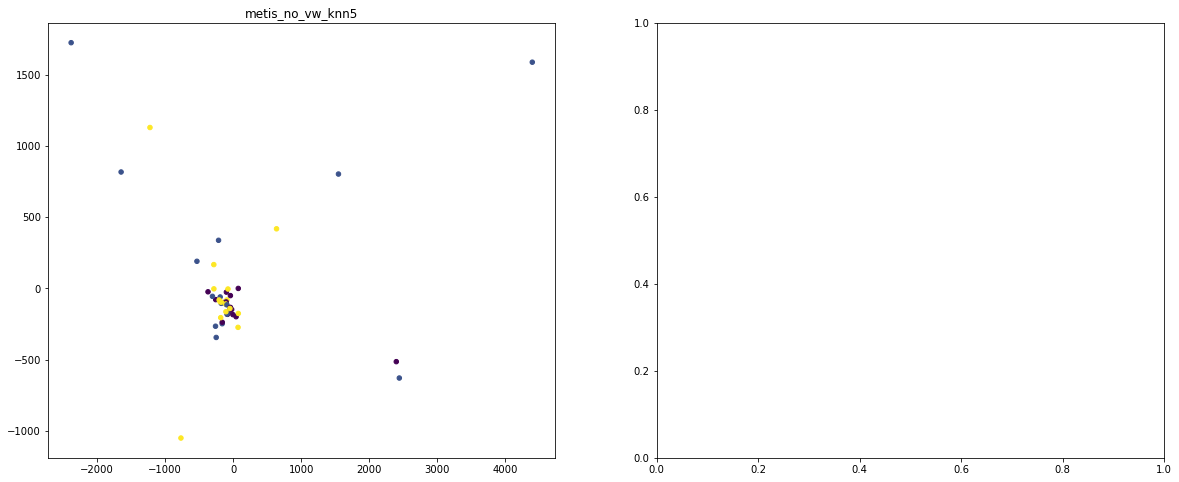

In [2]:
wPoint_CNN_L20 = pd.read_csv("./z_ass/wPCA_CNN_P1.6m_B10_L20_non_iid_zipfz0.7")
z_metis_knn5 = pd.read_csv("./z_ass/g_no_vw_knn5_d_euclidean_CNN_P1.6m_B10_L20_non_iid_zipfz0.7.part.5", header = None)
#z_metis_knn5 = pd.read_csv("./z_ass/g_knn5_d_euclidean_CNN_P1.6m_B10_L20_non_iid_zipfz0.7.part.5", header = None)


fig, axs = plt.subplots(1, 2, figsize=(20,8))

axs[0].scatter(wPoint_CNN_L20['pc1'],wPoint_CNN_L20['pc2'] , s= 20, 
               c=z_metis_knn5.values.squeeze())
#axs[1].scatter(wPoint_CNN_L20['pc1'],wPoint_CNN_L20['pc2'], s=20, c=z_metis_knn5.values.squeeze())


axs[0].set_title("metis_no_vw_knn5")
#axs[1].set_title("metis_knn5")

plt.show()


In [3]:
print (z_metis_knn5.values.squeeze())

[0 1 0 1 0 1 0 4 4 0 0 0 1 0 0 1 1 4 1 1 1 4 1 1 0 1 4 4 0 4 4 4 0 4 4 1 1
 0 4 0 4 1 0 1 4 1 0 4 0 4]


In [14]:
z = z_metis_knn5.values.squeeze()
print ("cluster distribution: ")
cluster = [[],[],[],[],[]]
for i in range(len(z)):
    cluster[z[i]].append(i)
for i in range(len(cluster)):
    print(cluster[i])

cluster distribution: 
[0, 1, 23, 41, 61, 80, 81, 84, 90, 95]
[3, 8, 12, 17, 18, 21, 32, 42, 48, 53, 67, 68, 69, 72, 73, 74, 75, 77, 83, 85, 87, 88, 91, 94, 99]
[7, 9, 10, 11, 13, 14, 19, 20, 22, 24, 30, 37, 43, 54, 63, 64]
[4, 5, 6, 15, 25, 34, 35, 39, 40, 49, 50, 55, 58, 59, 65, 71, 79, 82, 86, 89, 92, 93, 96, 97]
[2, 16, 26, 27, 28, 29, 31, 33, 36, 38, 44, 45, 46, 47, 51, 52, 56, 57, 60, 62, 66, 70, 76, 78, 98]


In [15]:
z = z_metis_knn1.values.squeeze()
print ("cluster distribution: ")
cluster = [[],[],[],[],[]]
for i in range(len(z)):
    cluster[z[i]].append(i)
for i in range(len(cluster)):
    print(cluster[i])

cluster distribution: 
[2, 7, 14, 15, 19, 20, 22, 26, 28, 30, 33, 34, 37, 41, 46, 62, 71, 76, 86, 89]
[3, 8, 12, 17, 18, 32, 48, 53, 61, 67, 68, 72, 75, 77, 80, 85, 87, 90, 91, 99]
[0, 1, 5, 11, 13, 29, 35, 36, 44, 45, 47, 50, 57, 63, 64, 81, 82, 92, 93, 96]
[6, 9, 10, 16, 23, 24, 31, 38, 51, 52, 55, 59, 60, 66, 69, 74, 83, 88, 95, 98]
[4, 21, 25, 27, 39, 40, 42, 43, 49, 54, 56, 58, 65, 70, 73, 78, 79, 84, 94, 97]


In [27]:
z = pd.read_csv("./z_ass/g_d_euclidean_L50_non_iid_zipfz0.7.part.5")
z = z.values.squeeze().astype(int)[:,1]
#print(z)
print ("cluster distribution: ./z_ass/g_d_euclidean_L50_non_iid_zipfz0.7.part.5 ")
cluster = [[],[],[],[],[]]
for i in range(len(z)):
    cluster[z[i]].append(i)
for i in range(len(cluster)):
    print(cluster[i])

cluster distribution: ./z_ass/g_d_euclidean_L50_non_iid_zipfz0.7.part.5 
[4, 5, 6, 21, 29, 31, 33, 38, 42, 49, 55, 58, 59, 61, 63, 64, 66, 67, 74, 79, 86, 89, 92, 93, 94]
[3, 7, 8, 9, 11, 12, 23, 26, 35, 36, 46, 68, 69, 73, 76, 77, 78, 90]
[13, 14, 17, 18, 19, 20, 22, 30, 37, 48, 50, 51, 52, 57, 60, 83, 85, 88, 91, 95, 97]
[1, 25, 32, 34, 41, 56, 65, 70, 72, 75, 80, 81, 87, 98, 99]
[0, 2, 10, 15, 16, 24, 27, 28, 39, 40, 43, 44, 45, 47, 53, 54, 62, 71, 82, 84, 96]


In [30]:
z = pd.read_csv("./z_ass/1z_rnd.part5")
z = z.values.squeeze().astype(int)
print(z)
print ("cluster distribution: ./z_ass/1z_rnd.part5 ")
cluster = [[],[],[],[],[]]
for i in range(len(z)):
    cluster[z[i]].append(i)
for i in range(len(cluster)):
    print(cluster[i])

[3 0 2 2 1 1 0 2 1 2 3 4 2 1 2 4 0 3 4 0 2 3 3 1 0 2 3 3 2 3 3 1 3 1 1 0 1
 2 3 1 4 4 1 0 1 4 3 1 2 3 2 1 3 2 4 2 3 3 3 4 2 3 0 2 4 2 2 1 0 2 3 1 3 3
 1 3 4 4 1 4 0 0 2 3 0 2 3 0 0 4 0 2 0 0 1 0 3 4 4]
cluster distribution: ./z_ass/1z_rnd.part5 
[1, 6, 16, 19, 24, 35, 43, 62, 68, 80, 81, 84, 87, 88, 90, 92, 93, 95]
[4, 5, 8, 13, 23, 31, 33, 34, 36, 39, 42, 44, 47, 51, 67, 71, 74, 78, 94]
[2, 3, 7, 9, 12, 14, 20, 25, 28, 37, 48, 50, 53, 55, 60, 63, 65, 66, 69, 82, 85, 91]
[0, 10, 17, 21, 22, 26, 27, 29, 30, 32, 38, 46, 49, 52, 56, 57, 58, 61, 70, 72, 73, 75, 83, 86, 96]
[11, 15, 18, 40, 41, 45, 54, 59, 64, 76, 77, 79, 89, 97, 98]
